In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#! unzip /content/drive/MyDrive/leedsbutterfly_dataset_v1.0.zip

In [ ]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

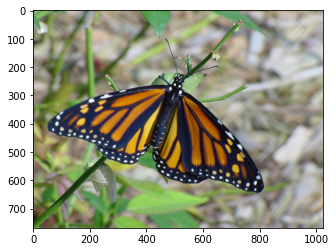

In [ ]:
imBRG = cv2.imread("/content/leedsbutterfly/images/0010001.png")
imRGB =cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

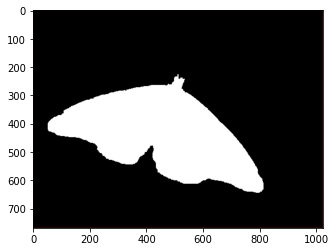

In [ ]:
seg = cv2.imread("/content/leedsbutterfly/segmentations/0010001_seg0.png")
seg =cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
plt.imshow(seg)
plt.show()

In [ ]:
seg

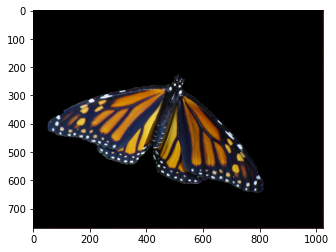

In [ ]:
import numpy as np
Obj = np.multiply(imRGB/255 , seg/255) # .* matlab
plt.imshow(Obj)
plt.show()

In [ ]:
### Chon ngau nhien 50 imgs de tinh toan colors_centers:
### Chỉ sử dụng thông tin OBJ bỏ qua thông tin nền
import os 
Image_names = os.listdir("/content/leedsbutterfly/images")
All_Objects_Pixels=np.zeros((2,3)) # to save pixels from 50 images
for i in range(0, 50):
  image_path = "/content/leedsbutterfly/images/" + Image_names[i]
  seg_path = "/content/leedsbutterfly/segmentations/" + Image_names[i].split('.')[0] +"_seg0.png"
  
  imBRG = cv2.imread(image_path)
  imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
  imRGB = imRGB/255

  seg = cv2.imread(seg_path)
  seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
  obj_pos = np.nonzero(seg[:,:,0]) # vi tri pixels cua object
  obj_pixel = imRGB[obj_pos[0], obj_pos[1],:] # chi lay gia tri pixel tren obj
  All_Objects_Pixels=np.concatenate((All_Objects_Pixels,obj_pixel), axis=0)




In [ ]:
# Total number pixels of 50 objects in 50 images:
np.shape(All_Objects_Pixels)

(6281175, 3)

In [ ]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
Randsamples = shuffle(All_Objects_Pixels,n_samples=10000)


In [ ]:
my_color_cluster = KMeans(n_clusters=16) # su dung 16 mau bieu dien anh
my_color_cluster.fit(Randsamples) #-> 16 centers


KMeans(n_clusters=16)

In [ ]:
# values of 16 colors: 
my_color_cluster.cluster_centers_ 

array([[0.21784417, 0.16205692, 0.1109382 ],
       [0.79756272, 0.76222644, 0.62802446],
       [0.54108897, 0.45960307, 0.34283101],
       [0.45181027, 0.33586635, 0.22151168],
       [0.92626285, 0.47707559, 0.07811065],
       [0.03003503, 0.0231412 , 0.01516158],
       [0.94543992, 0.94773253, 0.89200603],
       [0.421235  , 0.18869183, 0.05423471],
       [0.84427048, 0.56495937, 0.26119436],
       [0.13000877, 0.08163654, 0.05485719],
       [0.67540767, 0.3328712 , 0.07722981],
       [0.94736048, 0.07594268, 0.05392157],
       [0.67348764, 0.61458548, 0.4873753 ],
       [0.95900038, 0.8116263 , 0.486213  ],
       [0.89006463, 0.87544748, 0.73087523],
       [0.30613749, 0.25855894, 0.22030239]])

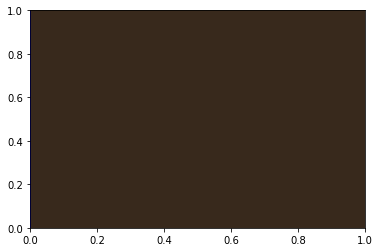

In [ ]:
## Hien thi 16 mau sac su dung:
# Mau 0
plt.axes()
color_id = my_color_cluster.cluster_centers_[0]
rect=plt.Rectangle((0,0), 20, 30, fc = color_id, ec="blue")
plt.gca().add_patch(rect)
plt.show()

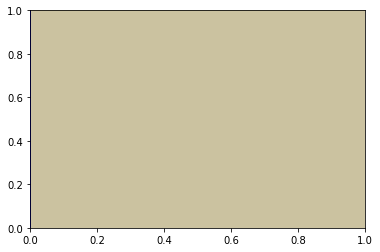

In [ ]:
## Hien thi 16 mau sac su dung:
#Mau 1
plt.axes()
color_id = my_color_cluster.cluster_centers_[1]
rect=plt.Rectangle((0,0), 20, 30, fc = color_id, ec="blue")
plt.gca().add_patch(rect)
plt.show()

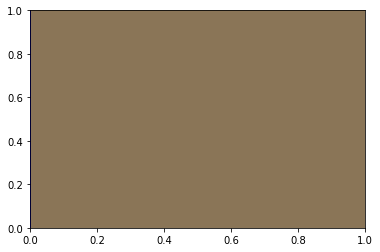

In [ ]:
## Hien thi 16 mau sac su dung:
#Mau 2
plt.axes()
color_id = my_color_cluster.cluster_centers_[2]
rect=plt.Rectangle((0,0), 20, 30, fc = color_id, ec="blue")
plt.gca().add_patch(rect)
plt.show()

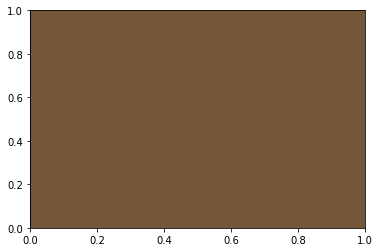

In [ ]:
## Hien thi 16 mau sac su dung:
#Mau 3
plt.axes()
color_id = my_color_cluster.cluster_centers_[3]
rect=plt.Rectangle((0,0), 20, 30, fc = color_id, ec="blue")
plt.gca().add_patch(rect)
plt.show()

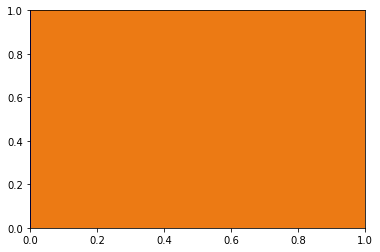

In [ ]:
## Hien thi 16 mau sac su dung:
#Mau 4
plt.axes()
color_id = my_color_cluster.cluster_centers_[4]
rect=plt.Rectangle((0,0), 20, 30, fc = color_id, ec="blue")
plt.gca().add_patch(rect)
plt.show()

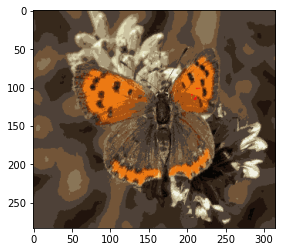

In [ ]:
#Hien thi anh quantization: 
#Vi du anh Image_names[0]:

image_path = "/content/leedsbutterfly/images/" + Image_names[0]
imBRG = cv2.imread(image_path)
imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
imRGB = imRGB/255
imRGB_array= imRGB.reshape((-1, 3))


imRGBnew=my_color_cluster.cluster_centers_[my_color_cluster.predict(imRGB_array)] 
imRGBnew=np.reshape(imRGBnew, np.shape(imRGB))


plt.imshow(imRGBnew)
plt.show()



In [ ]:
np.shape(imRGB)

(283, 315, 3)

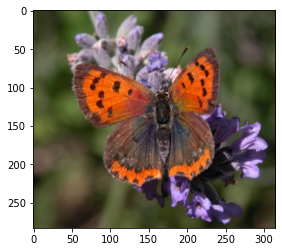

In [ ]:
# so sanh voi anh truoc khi quantization:
plt.imshow(imRGB)
plt.show()

In [ ]:
## Thuc hien tinh histogram mau sac cho anh tren:
## Chi tinh cho pixels thuoc obj :
seg_path = "/content/leedsbutterfly/segmentations/" + Image_names[0].split('.')[0] +"_seg0.png"
seg = cv2.imread(seg_path)
seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
obj_pos = np.nonzero(seg[:,:,0])
obj = imRGB[obj_pos[0], obj_pos[1],:]  # only pixels from object
color_id = my_color_cluster.predict(obj) # color_id duoc su dung de hien thi mau cho moi pixels trong obj

color_id[0:100]




array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       15, 15, 15, 15, 15, 15, 15, 15,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 15, 15, 15, 15,
       15,  3,  2,  2, 12, 12,  1,  1, 12, 12, 12, 12, 12, 12, 12, 12,  2,
        2,  3, 15, 15, 15, 15,  3,  3,  3, 15, 15, 15, 15, 15, 15],
      dtype=int32)

In [ ]:
# Tinh histogram cua color_id:
np.histogram(color_id, bins=16,range=(0,16))[0]

array([1892,   13, 1714, 4884, 3680,   56,    2, 1289,  541,  639, 3042,
         25,  153,   17,    4, 4566])

In [ ]:
# Chuan hoa theo so luong pixels tren objects:

np.shape(obj_pos)[1]

22517

In [ ]:
V= np.histogram(color_id, bins=16,range=(0,16))[0]/np.shape(obj_pos)[1]
V

array([8.40254030e-02, 5.77341564e-04, 7.61202647e-02, 2.16902785e-01,
       1.63432074e-01, 2.48700981e-03, 8.88217791e-05, 5.72456366e-02,
       2.40262912e-02, 2.83785584e-02, 1.35097926e-01, 1.11027224e-03,
       6.79486610e-03, 7.54985122e-04, 1.77643558e-04, 2.02780122e-01])

In [ ]:
### Nhu vay Image_name[0] duoc bieu dien boi vector V 

In [ ]:
### Bay gio ap dung cho toan bo du lieu:
#Thong tin anh ==> matran X//vector label y


  

In [ ]:
Image_color_histogram =[]
Class_id=[]
for i in range(0,832):
  image_path = "/content/leedsbutterfly/images/" + Image_names[i]
  seg_path = "/content/leedsbutterfly/segmentations/" + Image_names[i].split('.')[0] +"_seg0.png"
  imBRG = cv2.imread(image_path)
  imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
  imRGB = imRGB/255

  seg = cv2.imread(seg_path)
  seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
  obj_pos = np.nonzero(seg[:,:,0])
  obj = imRGB[obj_pos[0], obj_pos[1],:]
  
  color_id_image = my_color_cluster.predict(obj) 
  V= np.histogram(color_id_image, bins=16,range=(0,16))[0]/ np.shape(obj_pos)[1]
  Image_color_histogram.append(V)
  Class_id.append(int(Image_names[i][0:3]))

Image_color_histogram = np.array(Image_color_histogram)
Class_id = np.array(Class_id)




In [ ]:
X = Image_color_histogram #  832 x 16

## colormoment: X1=  832x9
y = Class_id # 832

In [ ]:
Training = X[0:500]
Training_label =y[0:500]
Testing = X[500:]
Testing_label =y[500:]




In [ ]:
from sklearn.svm import SVC
my_classification = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
my_classification.fit(Training ,Training_label )
my_classification.score(Testing ,Testing_label)

0.6867469879518072

In [ ]:
from sklearn.svm import SVC
my_classification = SVC(C=2, kernel='rbf',gamma='scale')
my_classification.fit(Training ,Training_label )
my_classification.score(Testing ,Testing_label)

0.7439759036144579

In [ ]:
from sklearn.svm import SVC
my_classification = SVC(C=5, kernel='rbf',gamma=50)
my_classification.fit(Training ,Training_label )
my_classification.score(Testing ,Testing_label)

0.7680722891566265

#Tim loi giai tot nhat: => Thay doi

#So luong mau sac: = n_clusters
#thuat toan phan loai: KNN/SVM,....[kernel, c, gammar]...
#cross_validations:
